<a id='Header' style="font-size:40px; color:#1D2951; text-decoration:none; text-align:center;">
    <center><b>An Overview and Analysis of<br/><br/>"tmdb-movies"</b></center>
</a>

<br/><br/>

<a id='Header' style="font-size:30px; color:#1D2951; text-decoration:none">
    <b> Table of Contents </b>
</a> 

<ul>
<li><a href="#intro" style="font-size:15px; color:#1D2951">Introduction</a></li>
<li><a href="#wrangling" style="font-size:15px; color:#1D2951">Data Wrangling</a></li>
<li><a href="#eda" style="font-size:15px; color:#1D2951">Exploratory Data Analysis</a></li>
<li><a href="#conclusions" style="font-size:15px; color:#1D2951">Conclusions</a></li>
</ul>

<hr>

<a id='intro' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Introduction</b></a>

<p style="font-size:17px"><p style="font-size:20px">Dataset: </p><br/>
I choose the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.

<p style="font-size:17px"><p style="font-size:20px"> Contain: </p>

Total Rows = 10866 <br/>
Total Columns = 21
<br/>
<br/>
    
    
<p style="font-size:20px"><b>Here in this analysis we'll get an overview of the dataset and try to see:</b></p>
<p style="font-size:17px">
<a href='#1'> * </a> Which genres are most popular from year to year?.<br/>

</p>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns

%matplotlib inline

# plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
# plt.style.use('seaborn-white')
plt.style.use('seaborn-deep')

<hr>
<br/>
<a id='wrangling' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Data Wrangling</b></a>

<p style="font-size:17px">Here we will see an overview,some intuitions about data, and perform some cleanings for missing values and etc.</p>

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Select only Genres and Release year to DataFrame
df = df.loc[:, ['genres','release_year','vote_average']]
#Check if there missing values in it
df.isnull().sum().sum()

23

In [5]:
#As there are only 23 missing data, it won't affect by deleting their rows
df.dropna(inplace=True)
df.isnull().sum().sum()

0

<hr>
<br/>
<a id='eda' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Exploratory Data Analysis</b></a>

<p style="font-size:17px">
Now that all data we will be using is clean, let's plot the background checks for vote average for movies. 
</p>

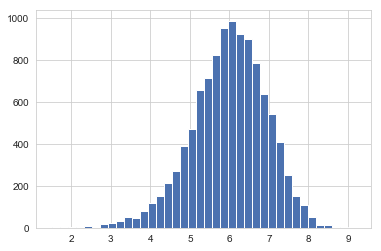

In [6]:
df['vote_average'].hist(bins=38)

   ####                                                We can figure out that average vote for all movies is 6.0 

<br>

<p id='1' style="font-size:20px ; color:#1D2951"> <b> Which genres are most popular from year to year? </b>
</p>

In [7]:
def genres_languages(row):
    genres_per_year.update(row) 

def get_max_genres(counterObj):
    #print(counterObj, '\n') 
    genre = max(counterObj, key=counterObj.get)
    dictObj = dict(counterObj)
    #print(dictObj, '\n\n', genre, '  ', dictObj[f"{genre}"], '\n\n\n' )
    return {f"{genre}" : dictObj[f"{genre}"]}

In [8]:
genres_per_year = Counter()
all_genres = dict()

for year in df['release_year'].unique():
    df_per_year = df[df['release_year'] == year]
    df_per_year['genres'].str.split("|").apply(genres_languages)
    all_genres[f"{year}"] = get_max_genres(genres_per_year)
    genres_per_year = Counter()

all_genres

{'2015': {'Drama': 260},
 '2014': {'Drama': 284},
 '1977': {'Drama': 24},
 '2009': {'Drama': 224},
 '2010': {'Drama': 211},
 '1999': {'Drama': 113},
 '2001': {'Comedy': 101},
 '2008': {'Drama': 233},
 '2011': {'Drama': 214},
 '2002': {'Drama': 130},
 '1994': {'Comedy': 88},
 '2012': {'Drama': 232},
 '2003': {'Comedy': 111},
 '1997': {'Drama': 83},
 '2013': {'Drama': 253},
 '1985': {'Comedy': 51},
 '2005': {'Drama': 182},
 '2006': {'Drama': 197},
 '2004': {'Drama': 141},
 '1972': {'Drama': 16},
 '1980': {'Drama': 32},
 '2007': {'Drama': 197},
 '1979': {'Drama': 30},
 '1984': {'Drama': 40},
 '1983': {'Drama': 35},
 '1995': {'Drama': 93},
 '1992': {'Drama': 65},
 '1981': {'Drama': 32},
 '1996': {'Drama': 104},
 '2000': {'Drama': 101},
 '1982': {'Drama': 33},
 '1998': {'Drama': 108},
 '1989': {'Comedy': 63},
 '1991': {'Drama': 63},
 '1988': {'Comedy': 69},
 '1987': {'Comedy': 57},
 '1968': {'Drama': 20},
 '1974': {'Drama': 21},
 '1975': {'Drama': 17},
 '1962': {'Drama': 21},
 '1964': {'Dra

In [9]:
def recursive_items(dictio):
    keys = []
    values = []
    for (_,nestedDict) in dictio.items():
        for (key, value) in nestedDict.items():
            keys.append(key)
            values.append(value)
    return keys, values

recursive_items(all_genres)

(['Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Comedy',
  'Drama',
  'Drama',
  'Drama',
  'Comedy',
  'Drama',
  'Comedy',
  'Drama',
  'Drama',
  'Comedy',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Comedy',
  'Drama',
  'Comedy',
  'Comedy',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Comedy',
  'Comedy',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Drama',
  'Comedy'],
 [260,
  284,
  24,
  224,
  211,
  113,
  101,
  233,
  214,
  130,
  88,
  232,
  111,
  83,
  253,
  51,
  182,
  197,
  141,
  16,
  32,
  197,
  30,
  40,
  35,
  93,
  65,
  32,
  104,
  101,
  33,
  108,
  63,
  63,
  69,
  57,
  20,
  21,
  17,
  21,
  20,
  30,
  60,
  16,
  13,
  22,
  90,
  17,
  13,
  51,
  31,
  19,
  20,
  13,
  29,
  16])

In [10]:
years = list(all_genres.keys())
genres, watched_numbers = recursive_items(all_genres)

plot_df = pd.DataFrame([years, genres, watched_numbers], index=['years', 'genres', 'watched_numbers']).T
plot_df.sort_values("years", inplace=True, ascending=False)
plot_df["years_genres"] = plot_df["years"] + ', ' + plot_df["genres"]
plot_df.head(3)

,years,genres,watched_numbers,years_genres
0,2015,Drama,260,"2015, Drama"
1,2014,Drama,284,"2014, Drama"
14,2013,Drama,253,"2013, Drama"


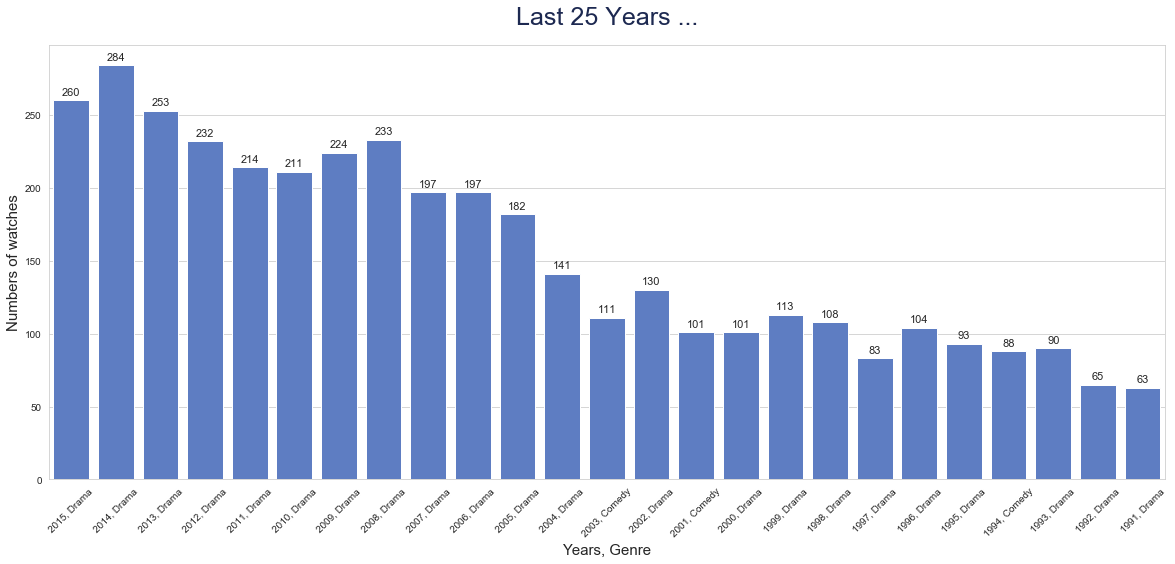

In [12]:
num_years_plotted = 25
# Defining the plotsize
plt.figure(figsize=(20, 8))
 
# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
plots = sns.barplot(x="years_genres", y="watched_numbers", data=plot_df[:num_years_plotted], color="#4D76D3")

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    annotate_value = int(bar.get_height())
    x_position = bar.get_x() + bar.get_width() / 2
    y_position = bar.get_height()
    plots.annotate(annotate_value, (x_position, y_position), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
        
# Setting the x-acis label and its size
plt.xlabel("Years, Genre", size=15)
plt.xticks(rotation=45)

 
# Setting the y-axis label and its size
plt.ylabel("Numbers of watches", size=15)
 
title_obj = plt.title(f"Last {num_years_plotted} Years ...", pad=20, fontsize=25)
plt.setp(title_obj, color='#1D2951');
    
# Finallt plotting the graph
plt.show()

<hr>
<br/>
<a id='conclusions' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Conclusions</b></a>

<p style="font-size:17px">
<b>• Summary — </b>From this graph we can see those only years (2003, 1994) most people were watching to Comedy movies, but the rest of years people were watching to Drama movies.
    
</p> 

<p style="font-size:17px">
<b>• Data limitations—</b> There are no limitations.<br/>
</p>
